# Mnist Handwritten Digits
In this notebook, we will use deep learning algorithm (Deep Feed Forward Neural Network) to classify and predict the handwritten digits (MNIST). First we will use EDA and some visualizations to understand the data and then we will train the model. Finally,
we will save the model so that it is ready to be used in an open world.

## Loading Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [3]:
print(f'x_train shape = {x_train.shape}\nx_test shape = {x_test.shape}\ny_train shape = {y_train.shape}\ny_test shape = {y_test.shape}')

x_train shape = (60000, 28, 28)
x_test shape = (10000, 28, 28)
y_train shape = (60000,)
y_test shape = (10000,)


## Visualization

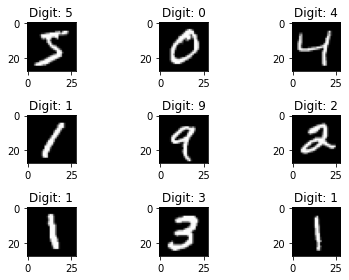

In [5]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')

plt.show()

Hence, these are the nine catgories of digits that we have in our dataset.

## Feature Scaling 

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Scaling/normalizing the data to help with the training.
x_train /= 255
x_test /= 255


print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


## Building And Training The Model

In [7]:
model = Sequential()

# Building the layers.
model.add(Dense(units=512, input_dim=784, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compiling the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Fitting and training the model.
hist = model.fit(x_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2188 - accuracy: 0.9352
Epoch 2/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0773 - accuracy: 0.9759
Epoch 3/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0503 - accuracy: 0.9840
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0359 - accuracy: 0.9883
Epoch 5/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 6/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0237 - accuracy: 0.9923
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0112 - accuracy: 0.9962

In [9]:
testing_result = model.evaluate(x_test, y_test)
print(testing_result)

313/313 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9798
[0.0927465409040451, 0.9797999858856201]


In [10]:
training_evaluation = model.evaluate(x_train, y_train)
print(training_evaluation)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0087 - accuracy: 0.9972
[0.008652949705719948, 0.9972166419029236]


Here, our both our training and testing accuracies are quite commendable. Hence, we can save our model and this model can be used in our app for predicting the handwritten digits.


## Saving The Model

In [11]:
model.save('handwritten_model.h5')

Therefore, we have saved our model and now it is ready to be used in any application.